## TP 1 - Visión por Computadora 1

### Carrera de Especialización en Inteligencia Artificial - Cohorte 17

### Autora: Micozzi, María Luz - a1707

In [1]:
# imports
import numpy as np
import cv2 as cv
from matplotlib import colors
import matplotlib.pyplot as plt

import sys
sys.path.append('../utils')
from functions import read_images, read_image, show_images, show_images_grey_scale

### Parte 1

#### 1. Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste.

In [2]:
# implementamos el algoritmo

def to_chromatic_coordinates(image: np.ndarray) -> np.ndarray:
    """
    Calcula las coordenadas cromáticas de una imagen determinada.

    :param image: imagen original
    :type image: numpy array
    :returns: coordenadas cromáticas de la imagen
    :rtype: numpy array
    """

    # pasamos los valores a float para mayor precisión
    image = image.astype(np.float32)
    
    # calculamos la suma de los canales R, G, B en cada pixel
    sum = np.sum(image, axis=-1, keepdims=True)
    
    # prevenimos la división por cero
    sum[sum == 0] = 1
    
    # obtenemos las coordenadas cromáticas dividiendo cada canal por la suma total
    chromatic_coordinates = image / sum
    
    return chromatic_coordinates

------

#### 2. Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.

In [3]:
# implementamos el algoritmo

def to_white_patch(image: np.ndarray) -> np.ndarray:
    """
    Aplica algoritmo with patch imagen determinada.

    :param image: imagen original
    :type image: numpy array
    :returns: nueva imagen
    :rtype: numpy array
    """

    # convertiomos la imagen a flotante para cálculos precisos
    image = image.astype(np.float32)
    
    # obtenemos los valores máximos de cada canal R, G y B
    R_max = np.max(image[:, :, 2])  # Canal R
    G_max = np.max(image[:, :, 1])  # Canal G
    B_max = np.max(image[:, :, 0])  # Canal B
    
    # evitamos divisiones por cero si algún canal es cero
    if R_max == 0: R_max = 1
    if G_max == 0: G_max = 1
    if B_max == 0: B_max = 1

    # aplicamos la normalización White-Patch
    image[:, :, 2] = image[:, :, 2] * (255.0 / R_max)  # Canal R
    image[:, :, 1] = image[:, :, 1] * (255.0 / G_max)  # Canal G
    image[:, :, 0] = image[:, :, 0] * (255.0 / B_max)  # Canal B

    # aseguramos que los valores están en el rango [0, 255] y convertir a entero
    image = np.clip(image, 0, 255).astype(np.uint8)
    
    return image

------

#### 3. Mostrar los resultados obtenidos y analizar las posibles fallas (si es que las hay) en el caso de White patch.

##### Pasaje a coordenadas cromáticas

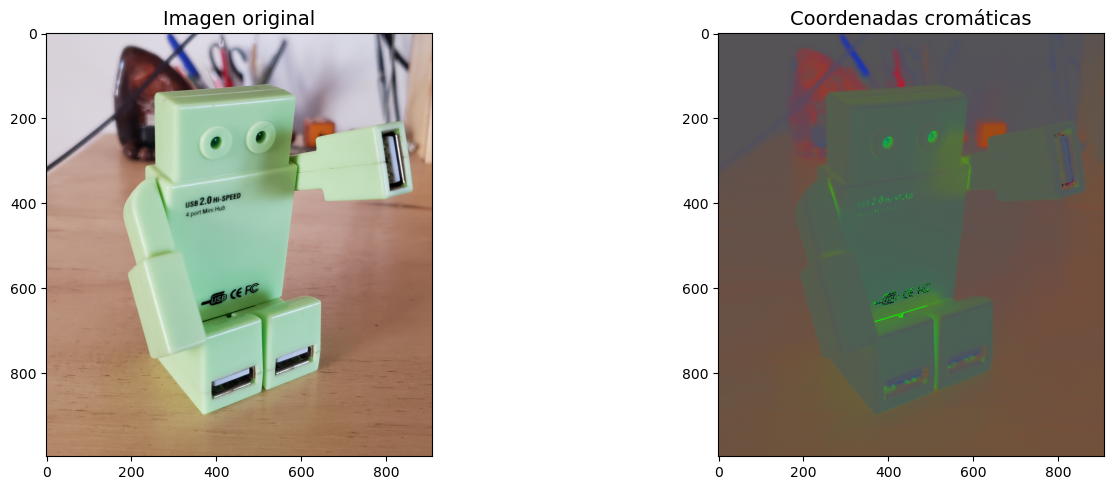

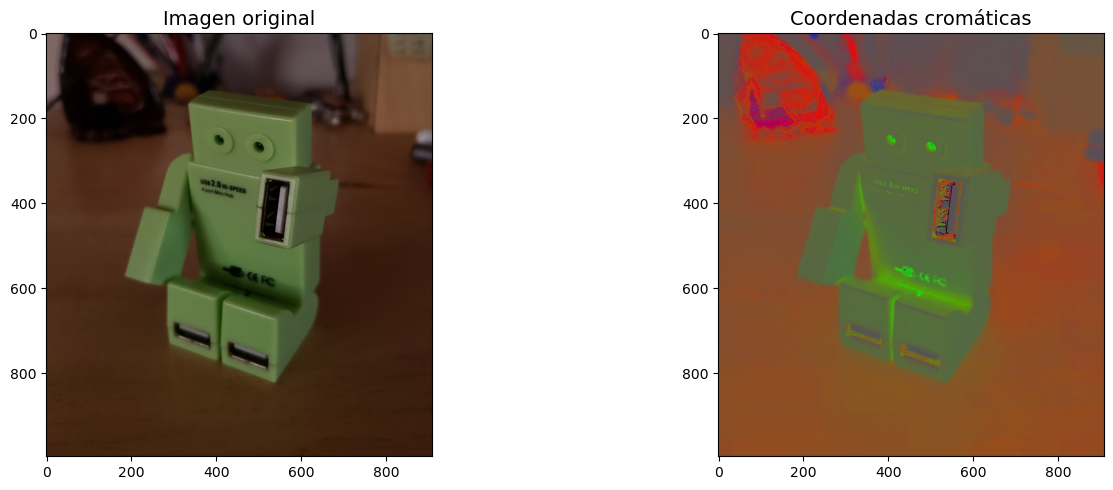

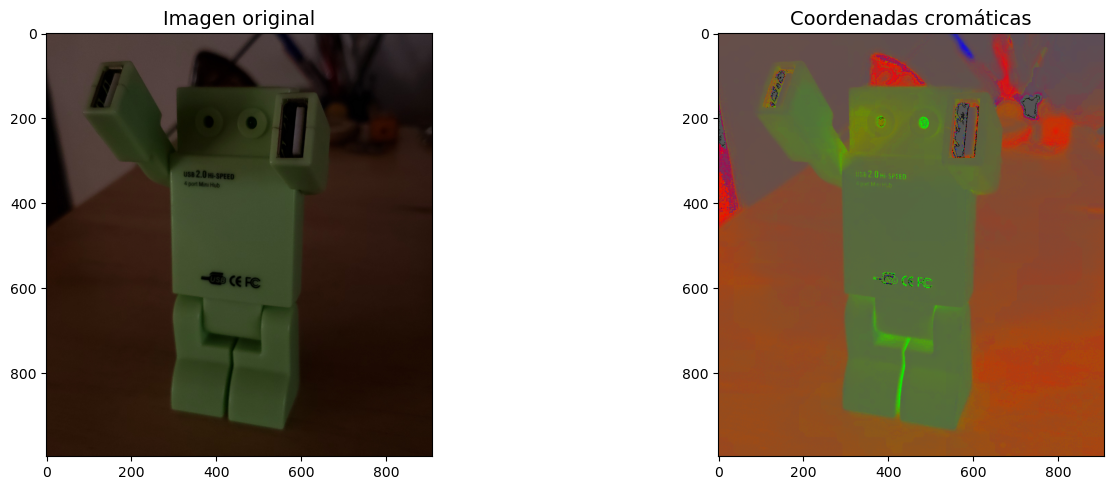

In [4]:
# leemos todas las imágenes del path correspondiente
original_chromatic_coordinates_images = read_images('Imagenes/coord_cromaticas')

# aplicamos el algoritmo a las imágenes

new_chromatic_coordinates_images = []

for i in range(3):
    new_image = to_chromatic_coordinates(original_chromatic_coordinates_images[i])
    new_chromatic_coordinates_images.append(new_image)

# mostramos las imágenes luego de aplicar el algoritmo de pasaje a coordenadas cromáticas

for i in range(3):
    show_images([original_chromatic_coordinates_images[i], new_chromatic_coordinates_images[i]], ['Imagen original', 'Coordenadas cromáticas'])

##### White Patch

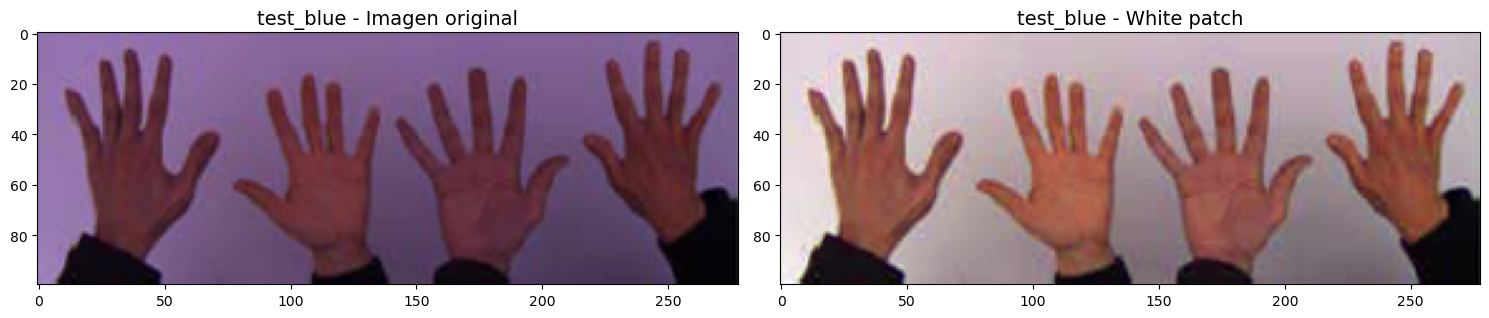

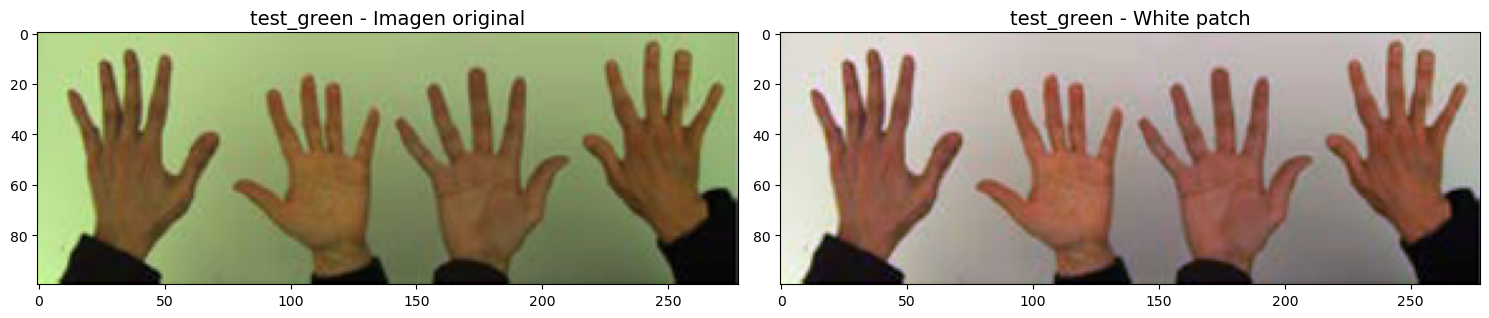

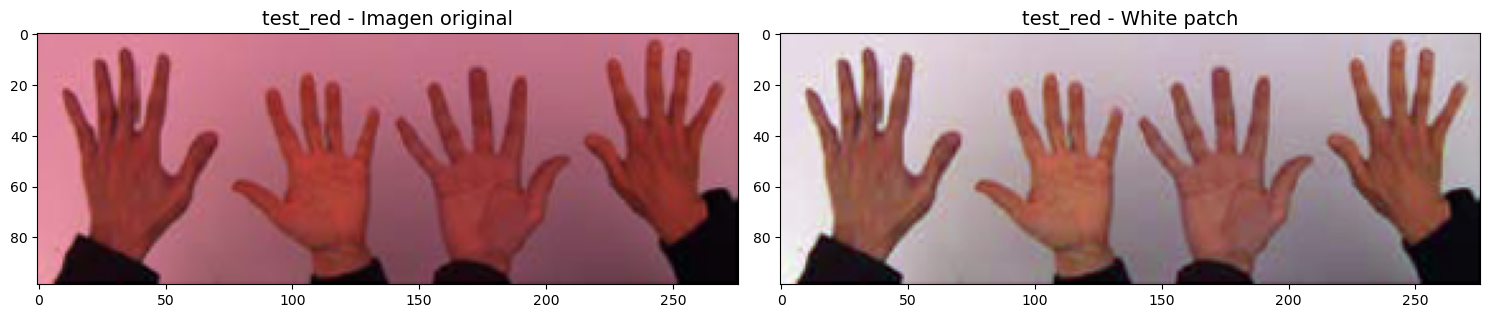

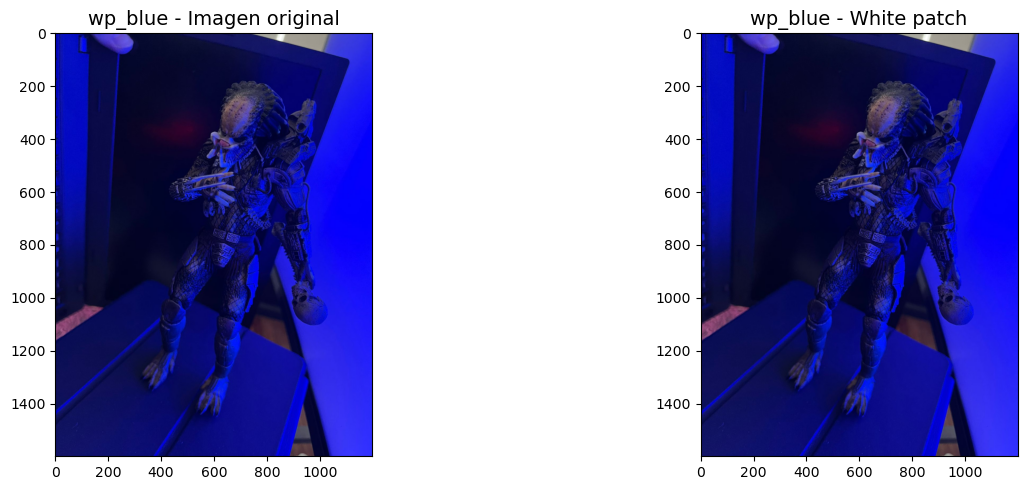

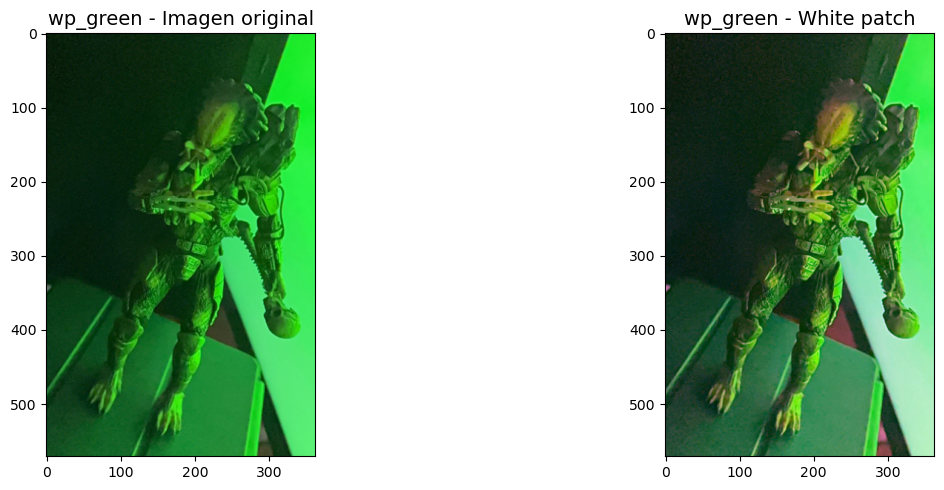

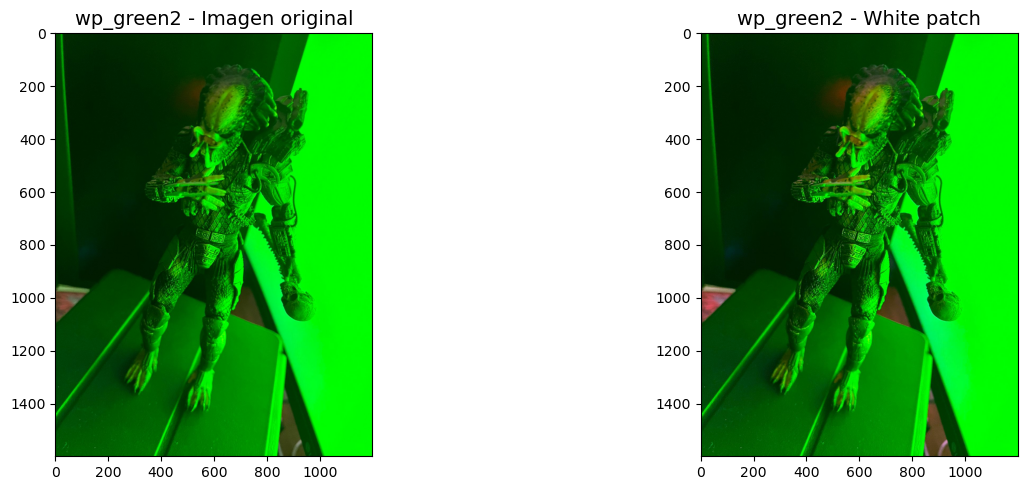

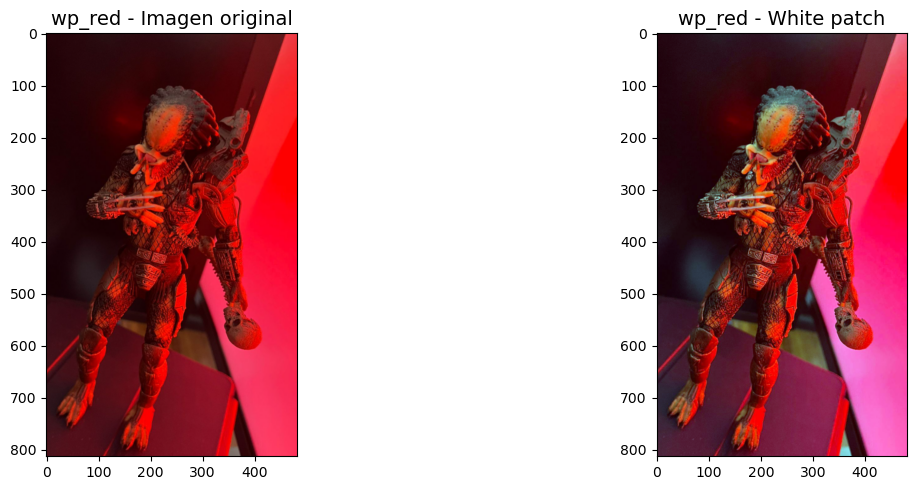

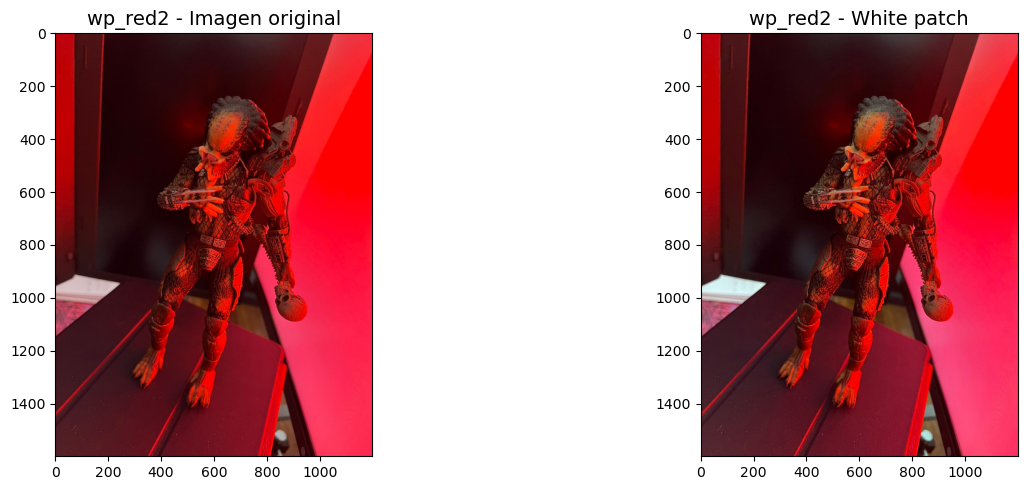

In [5]:

# leemos todas las imágenes del path correspondiente
original_white_patch_images = read_images('Imagenes/white_patch')

# aplicamos el algoritmo a las imágenes

new_white_patch_images = []

for i in range(8):
    new_image = to_white_patch(original_white_patch_images[i])
    new_white_patch_images.append(new_image)

# mostramos las imágenes luego de aplicar el algoritmo With Patch

show_images([original_white_patch_images[0], new_white_patch_images[0]], ['test_blue - Imagen original', 'test_blue - White patch'])
show_images([original_white_patch_images[1], new_white_patch_images[1]], ['test_green - Imagen original', 'test_green - White patch'])
show_images([original_white_patch_images[2], new_white_patch_images[2]], ['test_red - Imagen original', 'test_red - White patch'])
show_images([original_white_patch_images[3], new_white_patch_images[3]], ['wp_blue - Imagen original', 'wp_blue - White patch'])
show_images([original_white_patch_images[4], new_white_patch_images[4]], ['wp_green - Imagen original', 'wp_green - White patch'])
show_images([original_white_patch_images[5], new_white_patch_images[5]], ['wp_green2 - Imagen original', 'wp_green2 - White patch'])
show_images([original_white_patch_images[6], new_white_patch_images[6]], ['wp_red - Imagen original', 'wp_red - White patch'])
show_images([original_white_patch_images[7], new_white_patch_images[7]], ['wp_red2 - Imagen original', 'wp_red2 - White patch'])

Vemos que la corrección dio mejores resultados en las imagenes test_red, test_blue, test_green.

En el caso de las imágenes wp_red, wp_blue y wp_green el white patch asume que los píxeles más brillantes corresponden al blanco de la iluminación, lo que lleva a problemas si las áreas saturadas no son blancas. En estas imágenes, al intentar corregir colores sobre la base de una luz no blanca, el algoritmo puede ajustar en exceso, dando como resultado colores desaturados y pérdida de detalles originales.

Posibles fallas: El algoritmo se basa en el supuesto de que los puntos más brillantes representan el blanco, lo cual no siempre es cierto, sobre todo si la luz ambiental tiene un color predominante. En estos casos, el White Patch puede sobrecompensar y generar colores poco realistas.

El algoritmo White Patch funciona bien en imágenes con blancos en la escena, pero su rendimiento disminuye con colores dominantes o fuentes de luz intensas de un solo color.

------

### Parte 2

#### 1. Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grises y visualizarlas.

In [6]:
# leemos las imágenes en escala de grises

img1 = read_image('Imagenes', 'img1_tp.png',  cv.IMREAD_GRAYSCALE)
img2 = read_image('Imagenes', 'img2_tp.png',  cv.IMREAD_GRAYSCALE)

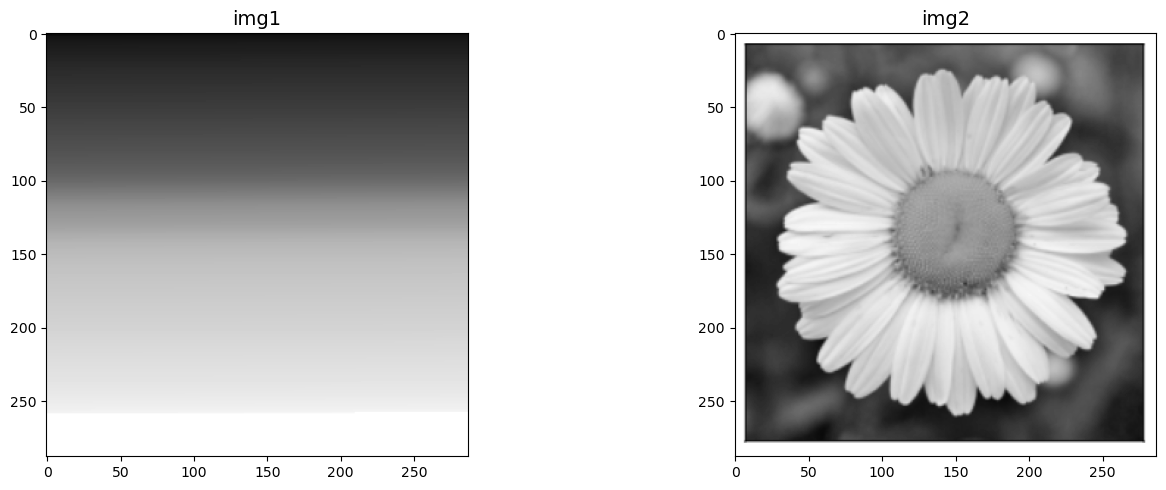

In [7]:
# mostramos las imágenes

show_images_grey_scale([img1, img2], ['img1', 'img2'])

------

#### 2. Elija el numerode bins que crea conveniente y grafique su histograma, compare los histogramas entre si. Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes, ¿considera que puede ser de utilidad tomar como ‘features’ a los histogramas?

Al ser una imagen en escala de grises se utilizaran 256 bins para el histograma, ya que nos permite representar todos los posibles niveles de gris (de 0 a 255).

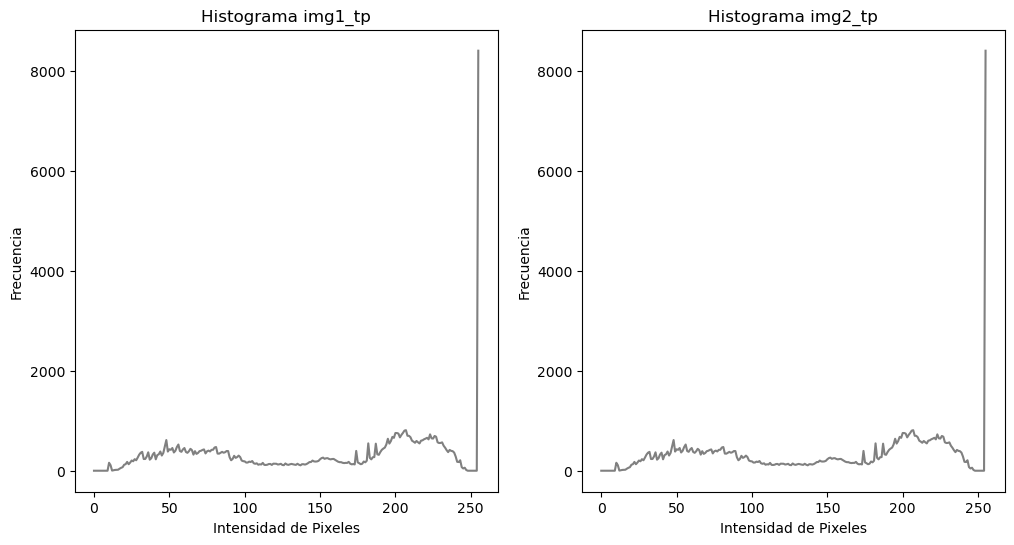

In [8]:
# gráficamos los histogramas

bins = 256

# histogramas
hist_img1, _ = np.histogram(img1.ravel(), bins, [0, 255])
hist_img2, _ = np.histogram(img2.ravel(), bins, [0, 255])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(hist_img1, color='grey')
plt.title('Histograma img1_tp')
plt.xlabel('Intensidad de Pixeles')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
plt.plot(hist_img2, color='grey')
plt.title('Histograma img2_tp')
plt.xlabel('Intensidad de Pixeles')
plt.ylabel('Frecuencia')

plt.show()

In [9]:
# comparamos ambos histogramas

equal = hist_img1 == hist_img2
equal.all()

np.True_

##### Análisis

En los histogramas podemos observar una alta frecuencia de pixeles con nivel de intensidad 255, esto representa el blanco puro y significa que una gran parte de la imagen está compuesta por píxeles blancos o muy cercanos al blanco.

En la imagen 1 vemos un degradado en escala de grises, mientras que en la imagen 2 vemos una flor en escala de grises.
A pesar de ser imágenes diferentes los histogramas correspondientes son iguales. Podemos asumir que la segunda imagen fue generada a partir de la primera.

Con este ejemplo podemos observar que dos imágenes pueden tener la misma cantidad de píxeles de cada color o tono, pero los elementos visuales (formas, patrones, objetos) pueden estar distribuidos de manera diferente.

Considerando lo anterior, podemos concluir que utilizar los histogramas como features para un modelo de detección / clasificación de imágenes no es de utilidad ya que no brinda la información relevante para estos modelos.

------

#### 3. Para la imagen segmentacion.png analice el histograma de los canales RGB. Segmente algunos de los elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando mascaras, las regiones en imágenes separadas.

In [10]:
# leemos la imagen
img = read_image('Imagenes', 'segmentacion.png')

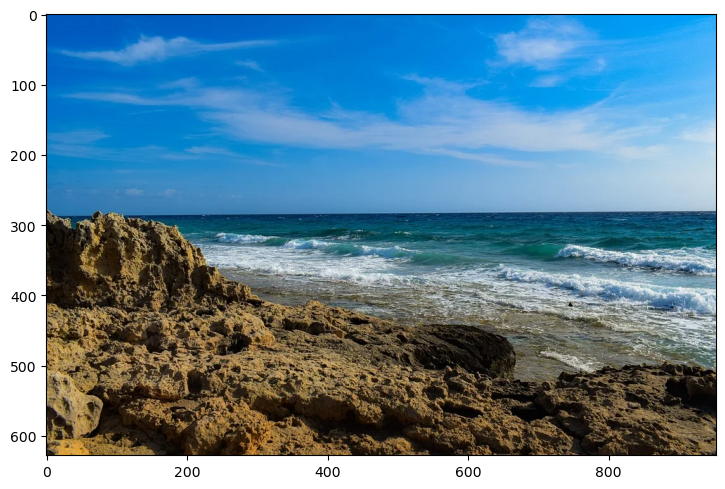

In [11]:
# mostramos la imagen
show_images([img])

##### Histograma

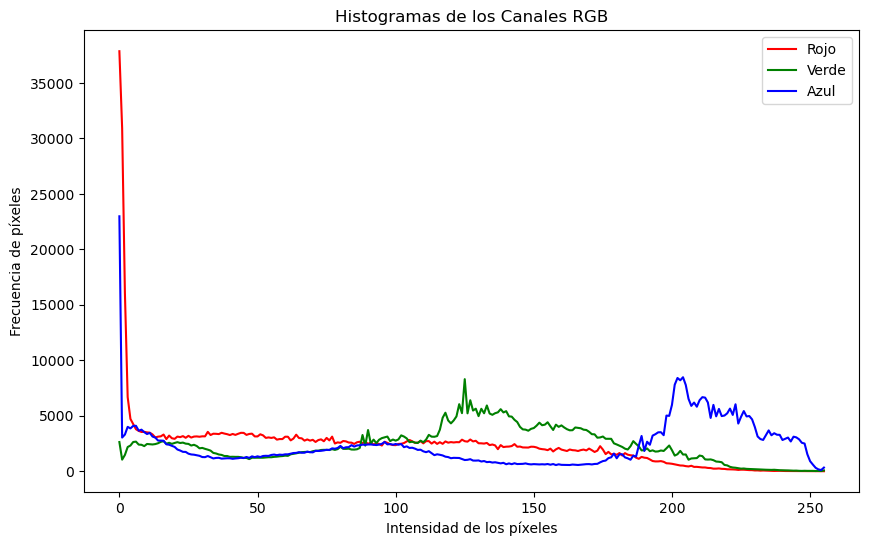

In [12]:
image_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

r, g, b = cv.split(image_rgb)

hist_r = cv.calcHist([r], [0], None, [256], [0, 256])
hist_g = cv.calcHist([g], [0], None, [256], [0, 256])
hist_b = cv.calcHist([b], [0], None, [256], [0, 256])

plt.figure(figsize=(10, 6))

plt.plot(hist_r, color='red', label='Rojo')
plt.plot(hist_g, color='green', label='Verde')
plt.plot(hist_b, color='blue', label='Azul')

plt.title('Histogramas de los Canales RGB')
plt.xlabel('Intensidad de los píxeles')
plt.ylabel('Frecuencia de píxeles')

plt.legend()
plt.show()

- Canal rojo: comienza con un pico en las intensidades más bajas, pero luego muestra una presencia considerablemente uniforme y disminuye lentamente hacia los valores más altos. Esto puede estar relacionado con la tierra.
- Canal azul: alta frecuencia en las intensidades más bajas. Luego podemos ver un predominio en las intensidades más alta, lo cual puede deberse al agua y cielo de nuestra imagen.
- Canal verde: notamos un predominio en el rango de 100 a 180, para luego disminuir hacia las intensidades más altas. Vemos representado el agua y cielo.

Los picos en las intensidades más bajas podría deberse a las sombras en la imagen, mientras que el predominio de pixeles con mayor intensidad para los canales verdes y azul representan el agua y mar en nuestra imagen.

##### Segmentación de la tierra

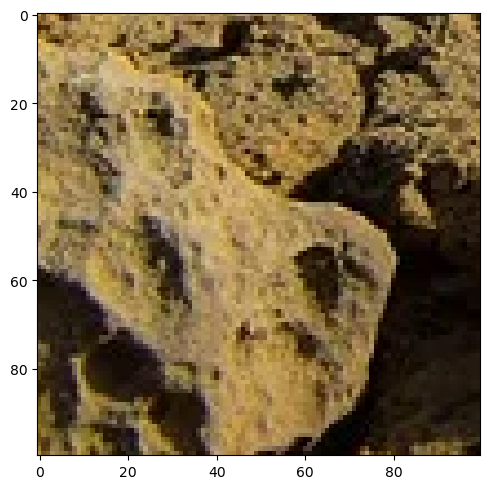

In [13]:
# Tomamos una muestra de la tierra
img_muestra = img[500:600, 0:100,:]
show_images([img_muestra])

In [14]:
#  calculamos los estadísticos de la imagen de muestra
color_mean, color_std = cv.meanStdDev(img_muestra)
print(color_mean.flatten().tolist())
print(color_std.flatten().tolist())

[56.016600000000004, 92.9465, 114.70270000000001]
[39.14510856339525, 55.793989261837154, 62.72766146374339]


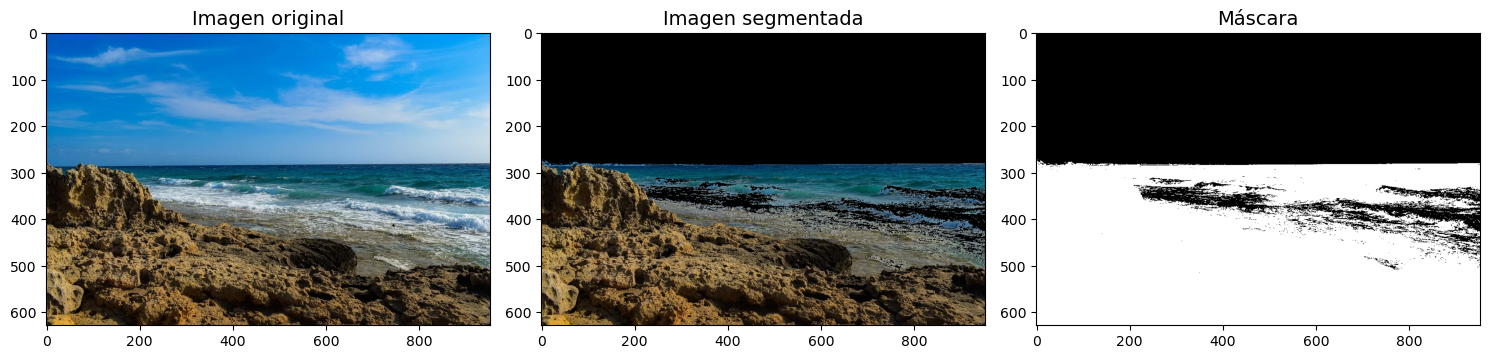

In [15]:
# creamos y aplicamos la máscara

n_sigma = 3
mask = cv.inRange(img, color_mean-color_std * n_sigma,  color_mean+color_std * n_sigma)
img_segmentada = cv.bitwise_and(img, img, mask=mask)

show_images([img, img_segmentada, mask], ['Imagen original', 'Imagen segmentada', 'Máscara'])

Para tratar de obtener una mejor segmentación utilizaremos los canales HSV para delimitar la máscara

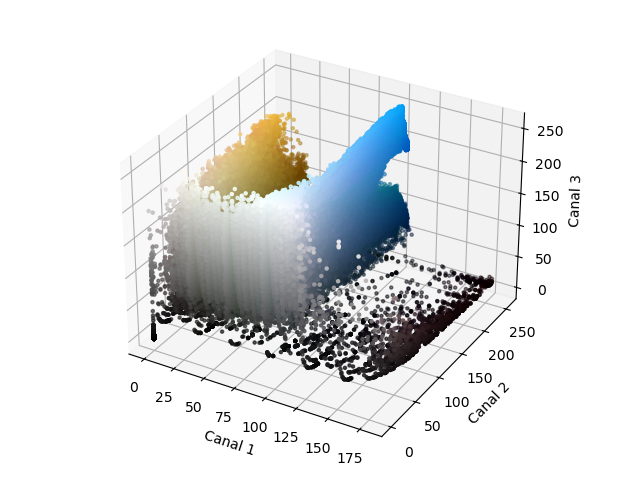

In [16]:
# gráficamos los canales HSV

%matplotlib widget

imgRGB = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_HSV = cv.cvtColor(img, cv.COLOR_BGR2HSV)
c1, c2, c3 = cv.split(img_HSV)

fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

pixel_colors = imgRGB.reshape((np.shape(imgRGB)[0]*np.shape(imgRGB)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(c1.flatten(), c2.flatten(), c3.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Canal 1")
axis.set_ylabel("Canal 2")
axis.set_zlabel("Canal 3")

plt.tight_layout()
plt.show()

%matplotlib inline

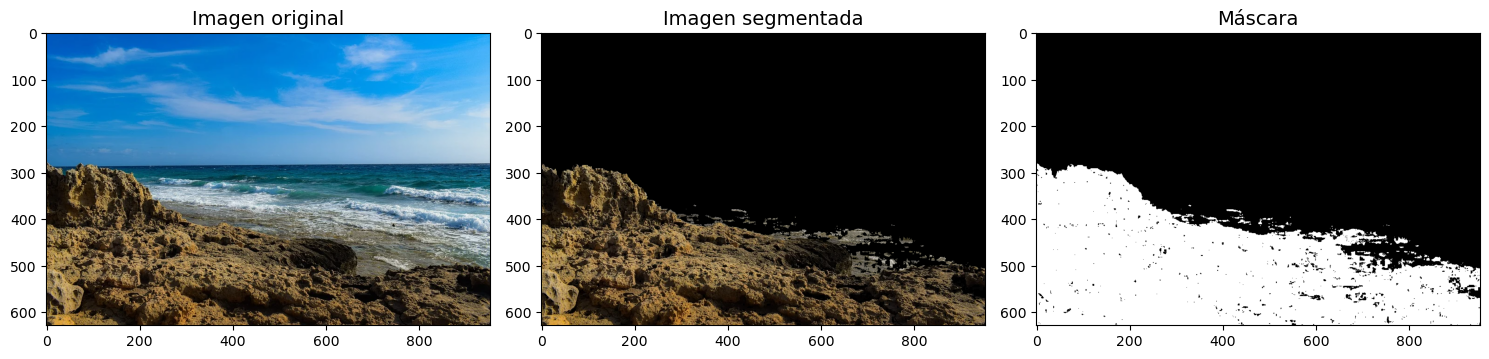

In [20]:
# creamos y aplicamos la nueva máscara

color_l = (0,0,0)
color_u = (25,255,255)

mask_ground = cv.inRange(img_HSV, color_l,  color_u)
img_segmentada = cv.bitwise_and(img, img, mask=mask_ground)

show_images([img, img_segmentada, mask_ground], ['Imagen original', 'Imagen segmentada', 'Máscara'])

El resultado no es perfecto, pero ha mejorado

##### Segmentación del cielo

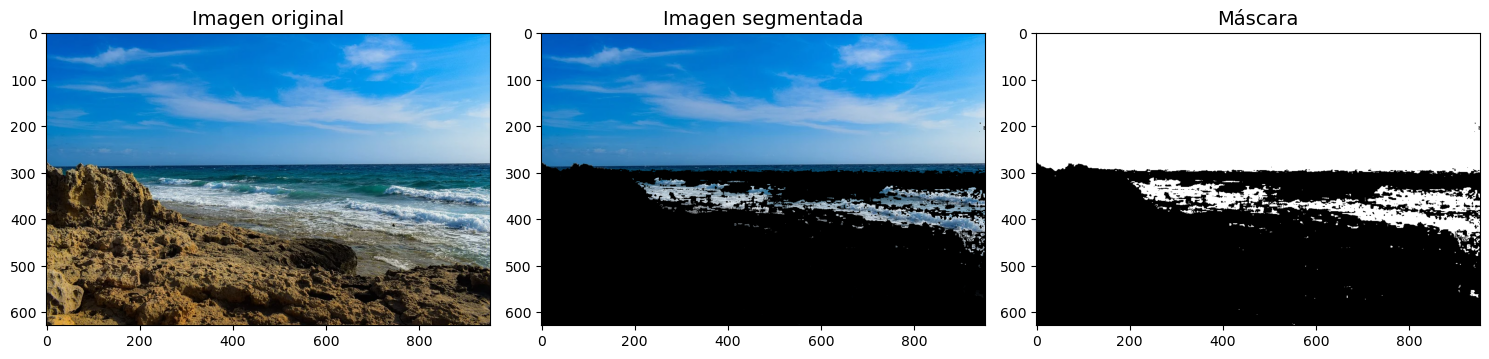

In [18]:
# creamos y aplicamos la máscara

color_l = (100,0,0)
color_u = (110,255,255)

mask_sky = cv.inRange(img_HSV, color_l,  color_u)
img_segmentada = cv.bitwise_and(img, img, mask=mask_sky)

show_images([img, img_segmentada, mask_sky], ['Imagen original', 'Imagen segmentada', 'Máscara'])

##### Segmentación del agua

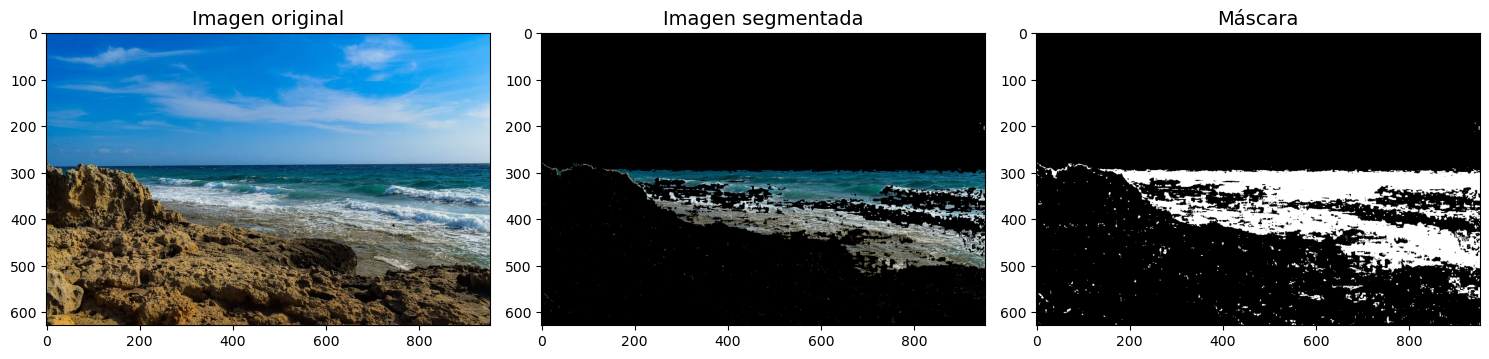

In [19]:
# creamos y aplicamos una máscara para el agua usando las máscaras del cielo y tierra

# invertimos las máscaras
mask_ground_inv = cv.bitwise_not(mask_ground)
mask_sky_inv = cv.bitwise_not(mask_sky)

# combinamos las máscaras invertidas para obtener el mar
mask_sea = cv.bitwise_and(mask_ground_inv, mask_sky_inv)

img_segmentada = cv.bitwise_and(img, img, mask=mask_sea)

show_images([img, img_segmentada, mask_sea], ['Imagen original', 'Imagen segmentada', 'Máscara'])

##### Conclusión 

Para la segmentación de la tierra se utilizaron dos métodos para la definición de la máscara (media y desvió estándar y HSV). Con el segundo método logró mejorarse la segmetación y el resultado puede considerarse aceptable.

Para la segmentación del cielo se filtró por las canales HSV, mientras que para el agua se creó una máscara invirtiendo y combinando las máscaras de la tierra y cielo.

Para la segmentación del cielo y el agua el problema es más complejo ya que están muy cercanos en el espacio de color.

En todos los casos se deberían usar métodos más avanzados para lograr una mejor segmentación.